In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
def make_simple_plot():
    fig, axes=plt.subplots(figsize=(12,5), nrows=1, ncols=2);
    axes[0].set_ylabel("$y$")
    axes[0].set_xlabel("$x$")
    axes[1].set_xlabel("$x$")
    axes[1].set_yticklabels([])
    axes[0].set_ylim([-2,2])
    axes[1].set_ylim([-2,2])
    plt.tight_layout();
    return axes
def make_plot():
    fig, axes=plt.subplots(figsize=(20,8), nrows=1, ncols=2);
    axes[0].set_ylabel("$p_R$")
    axes[0].set_xlabel("$x$")
    axes[1].set_xlabel("$x$")
    axes[1].set_yticklabels([])
    axes[0].set_ylim([0,1])
    axes[1].set_ylim([0,1])
    axes[0].set_xlim([0,1])
    axes[1].set_xlim([0,1])
    plt.tight_layout();
    return axes

In [3]:
df=pd.read_csv("religion.csv")
df.head()

,promney,rfrac
0,0.047790,0.00
1,0.051199,0.01
2,0.054799,0.02
3,0.058596,0.03
4,0.062597,0.04


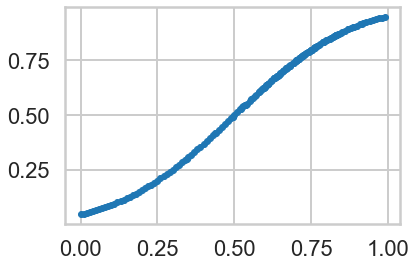

In [4]:
x=df.rfrac.values
f=df.promney.values
plt.plot(x,f,'.')

In [5]:
indexes=np.sort(np.random.choice(x.shape[0], size=30, replace=False))

In [6]:
samplex = x[indexes]
samplef = f[indexes]

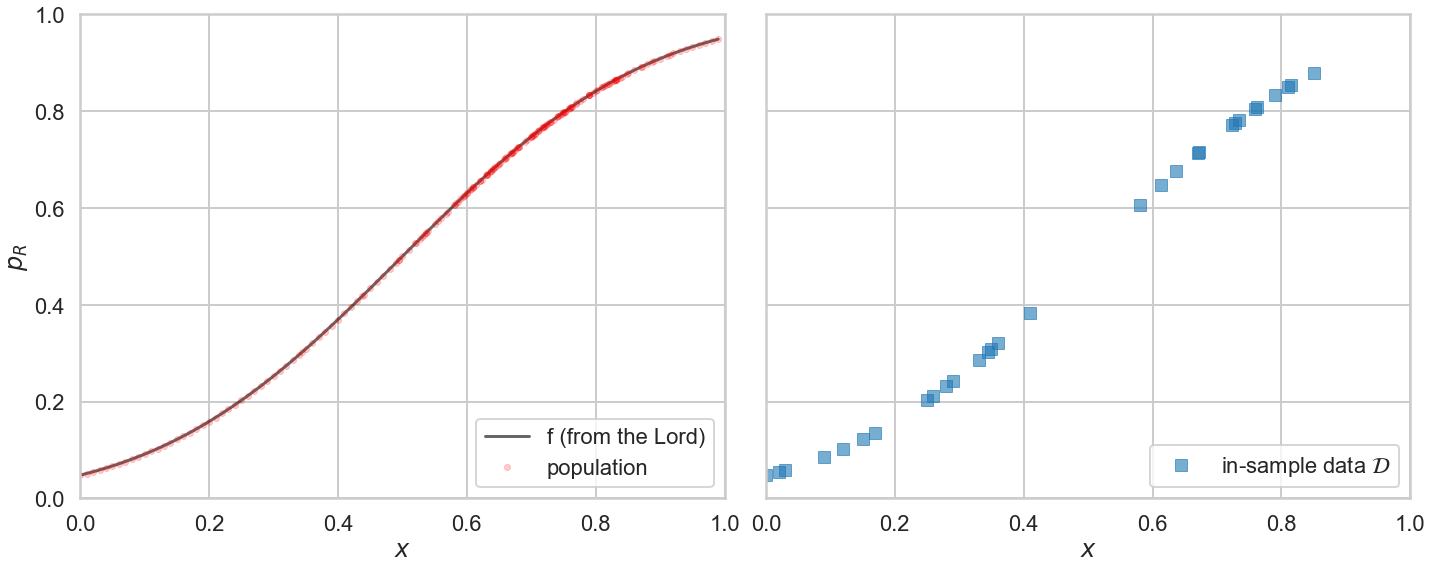

In [7]:
axes=make_plot()
axes[0].plot(x,f, 'k-', alpha=0.6, label="f (from the Lord)");
axes[0].plot(x,f, 'r.', alpha=0.2, label="population");
axes[1].plot(samplex,samplef, 's', alpha=0.6, label="in-sample data $\cal{D}$");
axes[0].legend(loc=4);
axes[1].legend(loc=4);

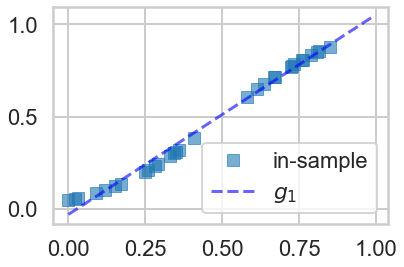

In [8]:
g1 = np.poly1d(np.polyfit(x[indexes],f[indexes],1))
plt.plot(x[indexes],f[indexes], 's', alpha=0.6, label="in-sample");
plt.plot(x,g1(x), 'b--', alpha=0.6, label="$g_1$");
plt.legend(loc=4);

In [9]:
g20 = np.poly1d(np.polyfit(x[indexes],f[indexes],20))

c:\users\prathyusha\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


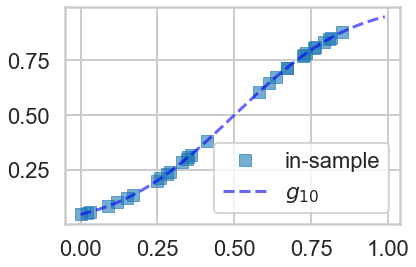

In [10]:
plt.plot(x[indexes],f[indexes], 's', alpha=0.6, label="in-sample");
plt.plot(x,g20(x), 'b--', alpha=0.6, label="$g_{10}$");
plt.legend(loc=4);

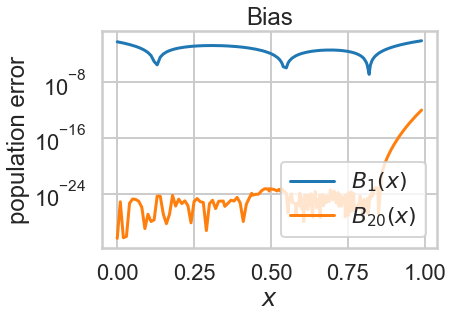

In [11]:
plt.plot(x, (g1(x)-f)**2, lw=3, label="$B_1(x)$")
plt.plot(x, (g20(x)-f)**2, lw=3,label="$B_{20}(x)$");
plt.xlabel("$x$")
plt.ylabel("population error")
plt.yscale("log")
plt.legend(loc=4);
plt.title("Bias");

c:\users\prathyusha\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


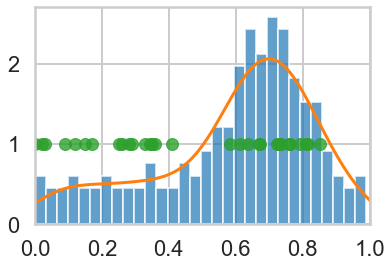

In [12]:
plt.hist(x, normed=True, bins=30, alpha=0.7)
sns.kdeplot(x)
plt.plot(x[indexes], [1.0]*len(indexes),'o', alpha=0.8)
plt.xlim([0,1]);

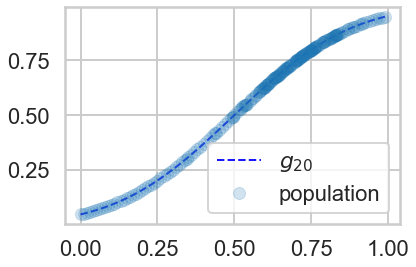

In [13]:
plt.plot(x,g20(x), 'b--', alpha=0.9, lw=2, label="$g_{20}$");
plt.plot(x,f, 'o', alpha=0.2, label="population");
plt.legend(loc=4);

In [14]:
sigma=0.06
mask=(x > 0.65) & (x < 0.8)
sigmalist=sigma+mask*0.03

In [15]:
y = f + sp.stats.norm.rvs(scale=sigmalist, size=200)
yadd = (y < 0.0) *(0.01-y)
ysub = (y > 1.0)*(y - 1.0)
y = y + yadd -ysub

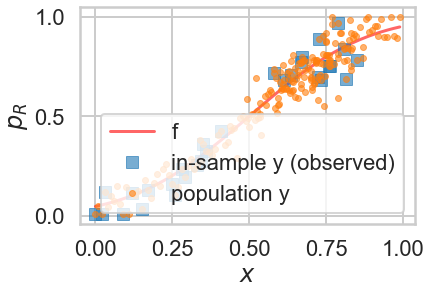

In [16]:
plt.plot(x,f, 'r-', alpha=0.6, label="f");
plt.plot(x[indexes], y[indexes], 's', alpha=0.6, label="in-sample y (observed)");
plt.plot(x, y, '.', alpha=0.6, label="population y");
plt.xlabel('$x$');
plt.ylabel('$p_R$')
plt.legend(loc=4);

In [17]:
g1noisy = np.poly1d(np.polyfit(x[indexes],y[indexes],1))
g20noisy = np.poly1d(np.polyfit(x[indexes],y[indexes],20))

c:\users\prathyusha\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: RankWarning: Polyfit may be poorly conditioned
  


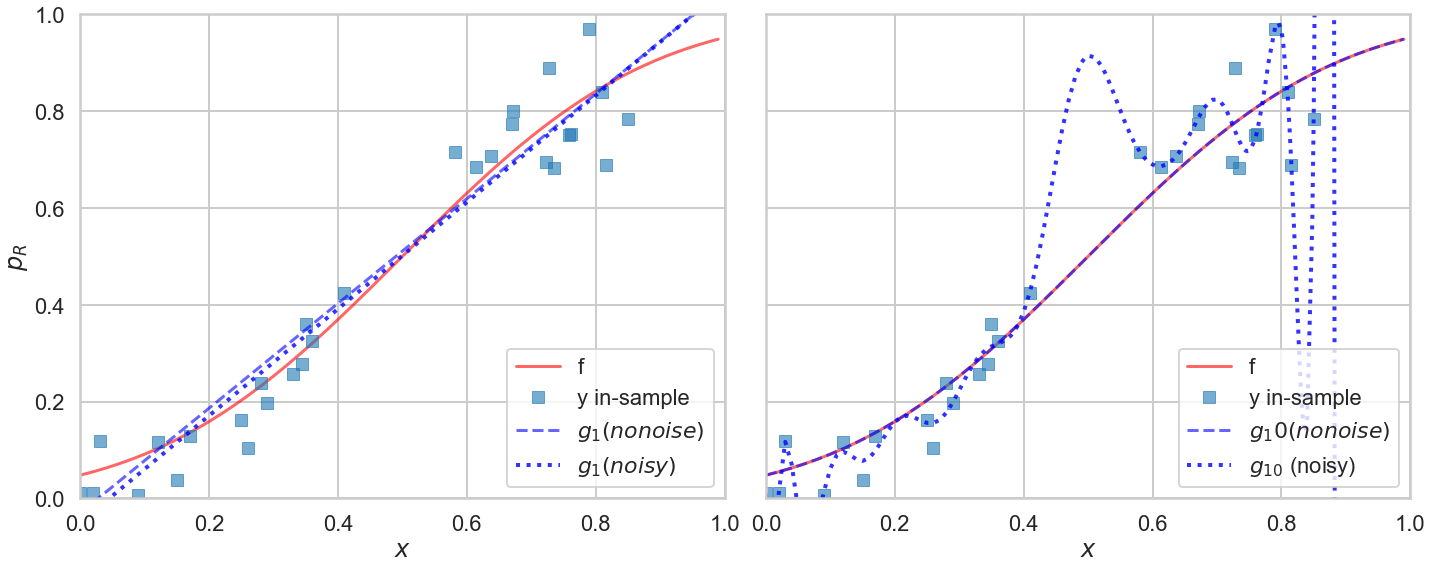

In [18]:
axes=make_plot()
axes[0].plot(x,f, 'r-', alpha=0.6, label="f");
axes[1].plot(x,f, 'r-', alpha=0.6, label="f");
axes[0].plot(x[indexes],y[indexes], 's', alpha=0.6, label="y in-sample");
axes[1].plot(x[indexes],y[indexes], 's', alpha=0.6, label="y in-sample");
axes[0].plot(x,g1(x),  'b--', alpha=0.6, label="$g_1 (no noise)$");
axes[0].plot(x,g1noisy(x), 'b:', lw=4, alpha=0.8, label="$g_1 (noisy)$");
axes[1].plot(x,g20(x),  'b--', alpha=0.6, label="$g_10 (no noise)$");
axes[1].plot(x,g20noisy(x), 'b:', lw=4, alpha=0.8, label="$g_{10}$ (noisy)");
axes[0].legend(loc=4);
axes[1].legend(loc=4);

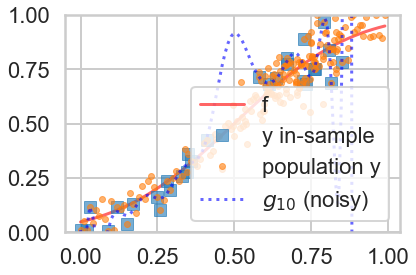

In [19]:
plt.plot(x,f, 'r-', alpha=0.6, label="f");
plt.plot(x[indexes],y[indexes], 's', alpha=0.6, label="y in-sample");
plt.plot(x,y,  '.', alpha=0.6, label="population y");
plt.plot(x,g20noisy(x), 'b:', alpha=0.6, label="$g_{10}$ (noisy)");
plt.ylim([0,1])
plt.legend(loc=4);

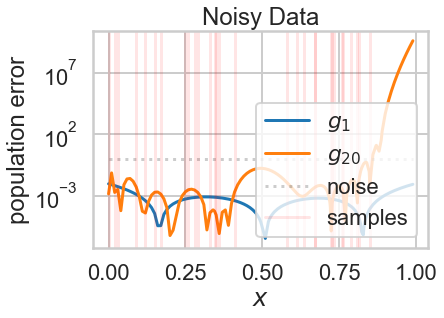

In [20]:
plt.plot(x, ((g1noisy(x)-f)**2), lw=3, label="$g_1$")
plt.plot(x, ((g20noisy(x)-f)**2), lw=3,label="$g_{20}$");
plt.plot(x, [1]*x.shape[0], "k:", label="noise", alpha=0.2);
for i in indexes[:-1]:
    plt.axvline(x[i], 0, 1, color='r', alpha=0.1)
plt.axvline(x[indexes[-1]], 0, 1, color='r', alpha=0.1, label="samples")
plt.xlabel("$x$")
plt.ylabel("population error")
plt.yscale("log")
plt.legend(loc=4);
plt.title("Noisy Data");

In [21]:
def gen(degree, nsims, size, x, out):
    outpoly=[]
    for i in range(nsims):
        indexes=np.sort(np.random.choice(x.shape[0], size=size, replace=False))
        pc=np.polyfit(x[indexes], out[indexes], degree)
        p=np.poly1d(pc)
        outpoly.append(p)
    return outpoly

In [22]:
polys1 = gen(1, 200, 30,x, y);
polys20 = gen(20, 200, 30,x, y);

c:\users\prathyusha\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
c:\users\prathyusha\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
c:\users\prathyusha\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
c:\users\prathyusha\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
c:\users\prathyusha\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
c:\users\prathyusha\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
c:\users\prathyusha\appdata\local\programs\python\py

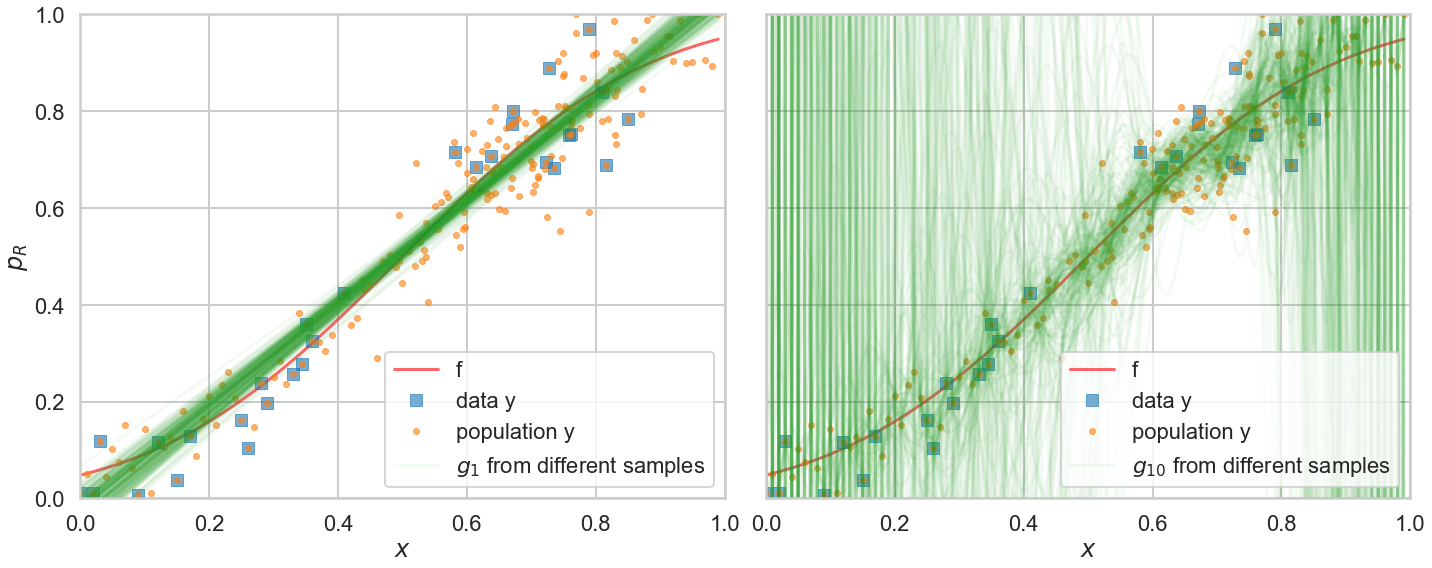

In [23]:
axes=make_plot()
axes[0].plot(x,f, 'r-', lw=3, alpha=0.6, label="f");
axes[1].plot(x,f, 'r-', lw=3, alpha=0.6, label="f");
axes[0].plot(x[indexes], y[indexes], 's', alpha=0.6, label="data y");
axes[1].plot(x[indexes], y[indexes], 's', alpha=0.6, label="data y");
axes[0].plot(x, y, '.', alpha=0.6, label="population y");
axes[1].plot(x, y, '.', alpha=0.6, label="population y");
c=sns.color_palette()[2]
for i,p in enumerate(polys1[:-1]):
    axes[0].plot(x,p(x), alpha=0.05, c=c)
axes[0].plot(x,polys1[-1](x), alpha=0.05, c=c,label="$g_1$ from different samples")
for i,p in enumerate(polys20[:-1]):
    axes[1].plot(x,p(x), alpha=0.05, c=c)
axes[1].plot(x,polys20[-1](x), alpha=0.05, c=c, label="$g_{10}$ from different samples")
axes[0].legend(loc=4);
axes[1].legend(loc=4);

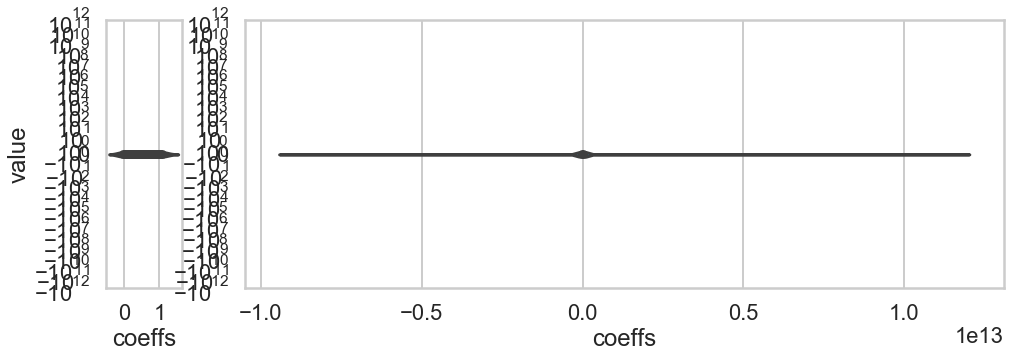

In [24]:
pdict1={}
pdict20={}
for i in reversed(range(2)):
    pdict1[i]=[]
    for j, p in enumerate(polys1):
        pdict1[i].append(p.c[i])
for i in reversed(range(21)):
    pdict20[i]=[]
    for j, p in enumerate(polys20):
        pdict20[i].append(p.c[i]) 
df1=pd.DataFrame(pdict1)
df20=pd.DataFrame(pdict20)
fig = plt.figure(figsize=(14, 5)) 
from matplotlib import gridspec
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 10]) 
axes = [plt.subplot(gs[0]), plt.subplot(gs[1])]
axes[0].set_ylabel("value")
axes[0].set_xlabel("coeffs")
axes[1].set_xlabel("coeffs")
plt.tight_layout();
sns.violinplot(df1, ax=axes[0]);
sns.violinplot(df20, ax=axes[1]);
axes[0].set_yscale("symlog");
axes[1].set_yscale("symlog");
axes[0].set_ylim([-1e12, 1e12]);
axes[1].set_ylim([-1e12, 1e12]);

In [25]:
df=pd.DataFrame(dict(x=x[indexes],f=f[indexes],y=y[indexes]))

In [27]:
from sklearn.model_selection import train_test_split
datasize=df.shape[0]
itrain,itest = train_test_split(range(30),train_size=24, test_size=6)
xtrain= df.x[itrain].values
ftrain = df.f[itrain].values
ytrain = df.y[itrain].values
xtest= df.x[itest].values
ftest = df.f[itest].values
ytest = df.y[itest].values

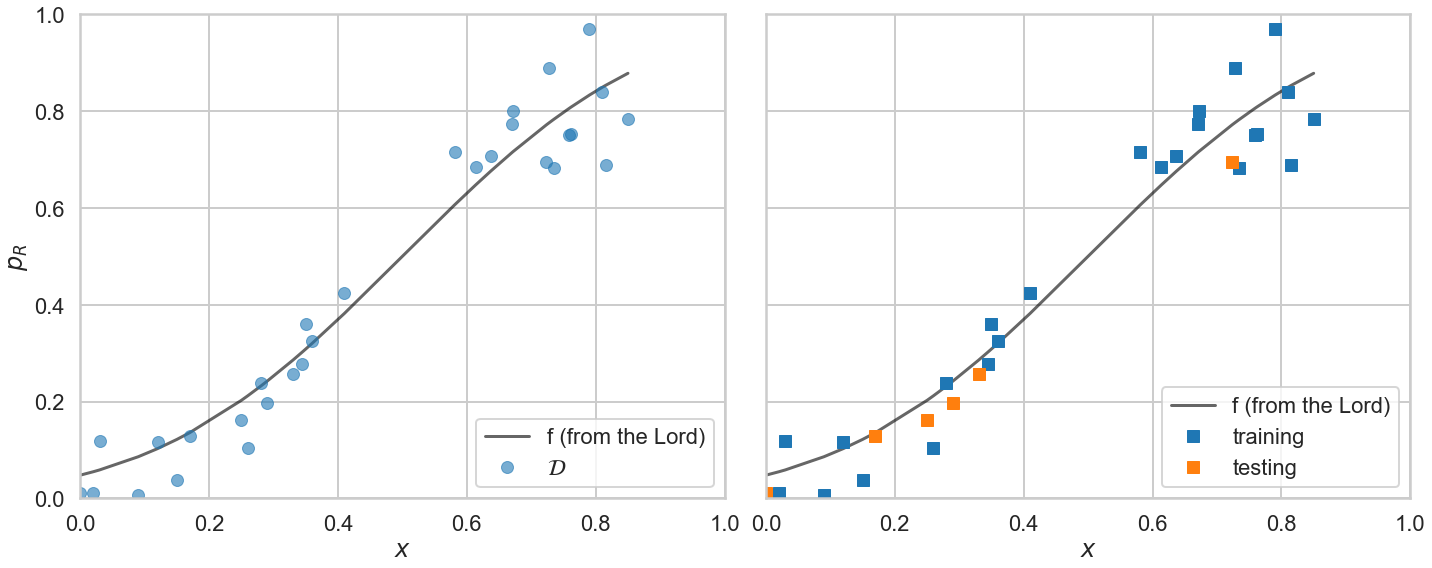

In [28]:
axes=make_plot()
axes[0].plot(df.x,df.f, 'k-', alpha=0.6, label="f (from the Lord)");
axes[0].plot(df.x,df.y, 'o',alpha=0.6, label="$\cal{D}$");
axes[1].plot(df.x,df.f, 'k-', alpha=0.6, label="f (from the Lord)");
axes[1].plot(xtrain, ytrain, 's', label="training")
axes[1].plot(xtest, ytest, 's', label="testing")
axes[0].legend(loc="lower right")
axes[1].legend(loc="lower right")

In [29]:
from sklearn.preprocessing import PolynomialFeatures
PolynomialFeatures(3).fit_transform([[1],[2], [3]])

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.]])

In [30]:
np.array([1,2,3]).reshape(-1,1)

array([[1],
       [2],
       [3]])

In [31]:
xtrain

array([0.03      , 0.85      , 0.35      , 0.80965752, 0.12      ,
       0.63712089, 0.6717333 , 0.41      , 0.36      , 0.02      ,
       0.67      , 0.09      , 0.7276294 , 0.81523718, 0.58113268,
       0.7902686 , 0.26      , 0.28      , 0.76197333, 0.7344196 ,
       0.75841654, 0.61360216, 0.15      , 0.34471571])

In [32]:
xtrain.reshape(-1,1)

array([[0.03      ],
       [0.85      ],
       [0.35      ],
       [0.80965752],
       [0.12      ],
       [0.63712089],
       [0.6717333 ],
       [0.41      ],
       [0.36      ],
       [0.02      ],
       [0.67      ],
       [0.09      ],
       [0.7276294 ],
       [0.81523718],
       [0.58113268],
       [0.7902686 ],
       [0.26      ],
       [0.28      ],
       [0.76197333],
       [0.7344196 ],
       [0.75841654],
       [0.61360216],
       [0.15      ],
       [0.34471571]])

In [33]:
PolynomialFeatures(2).fit_transform(xtrain.reshape(-1,1))

array([[1.00000000e+00, 3.00000000e-02, 9.00000000e-04],
       [1.00000000e+00, 8.50000000e-01, 7.22500000e-01],
       [1.00000000e+00, 3.50000000e-01, 1.22500000e-01],
       [1.00000000e+00, 8.09657516e-01, 6.55545293e-01],
       [1.00000000e+00, 1.20000000e-01, 1.44000000e-02],
       [1.00000000e+00, 6.37120888e-01, 4.05923025e-01],
       [1.00000000e+00, 6.71733304e-01, 4.51225632e-01],
       [1.00000000e+00, 4.10000000e-01, 1.68100000e-01],
       [1.00000000e+00, 3.60000000e-01, 1.29600000e-01],
       [1.00000000e+00, 2.00000000e-02, 4.00000000e-04],
       [1.00000000e+00, 6.70000000e-01, 4.48900000e-01],
       [1.00000000e+00, 9.00000000e-02, 8.10000000e-03],
       [1.00000000e+00, 7.27629404e-01, 5.29444549e-01],
       [1.00000000e+00, 8.15237181e-01, 6.64611661e-01],
       [1.00000000e+00, 5.81132683e-01, 3.37715195e-01],
       [1.00000000e+00, 7.90268602e-01, 6.24524464e-01],
       [1.00000000e+00, 2.60000000e-01, 6.76000000e-02],
       [1.00000000e+00, 2.80000

In [34]:
def make_features(train_set, test_set, degrees):
    traintestlist=[]
    for d in degrees:
        traintestdict={}
        traintestdict['train'] = PolynomialFeatures(d).fit_transform(train_set.reshape(-1,1))
        traintestdict['test'] = PolynomialFeatures(d).fit_transform(test_set.reshape(-1,1))
        traintestlist.append(traintestdict)
    return traintestlist

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

degrees=range(21)
error_train=np.empty(len(degrees))
error_test=np.empty(len(degrees))

traintestlists=make_features(xtrain, xtest, degrees)

In [36]:
traintestlists[3]['train'], ytrain

(array([[1.00000000e+00, 3.00000000e-02, 9.00000000e-04, 2.70000000e-05],
        [1.00000000e+00, 8.50000000e-01, 7.22500000e-01, 6.14125000e-01],
        [1.00000000e+00, 3.50000000e-01, 1.22500000e-01, 4.28750000e-02],
        [1.00000000e+00, 8.09657516e-01, 6.55545293e-01, 5.30767174e-01],
        [1.00000000e+00, 1.20000000e-01, 1.44000000e-02, 1.72800000e-03],
        [1.00000000e+00, 6.37120888e-01, 4.05923025e-01, 2.58622038e-01],
        [1.00000000e+00, 6.71733304e-01, 4.51225632e-01, 3.03103285e-01],
        [1.00000000e+00, 4.10000000e-01, 1.68100000e-01, 6.89210000e-02],
        [1.00000000e+00, 3.60000000e-01, 1.29600000e-01, 4.66560000e-02],
        [1.00000000e+00, 2.00000000e-02, 4.00000000e-04, 8.00000000e-06],
        [1.00000000e+00, 6.70000000e-01, 4.48900000e-01, 3.00763000e-01],
        [1.00000000e+00, 9.00000000e-02, 8.10000000e-03, 7.29000000e-04],
        [1.00000000e+00, 7.27629404e-01, 5.29444549e-01, 3.85239422e-01],
        [1.00000000e+00, 8.15237181e-0

In [37]:
traintestlists[3]['test'], ytest

(array([[1.        , 0.17      , 0.0289    , 0.004913  ],
        [1.        , 0.29      , 0.0841    , 0.024389  ],
        [1.        , 0.25      , 0.0625    , 0.015625  ],
        [1.        , 0.        , 0.        , 0.        ],
        [1.        , 0.33      , 0.1089    , 0.035937  ],
        [1.        , 0.72329536, 0.52315617, 0.37839643]]),
 array([0.12920639, 0.19676619, 0.16155447, 0.01      , 0.25734099,
        0.69530743]))

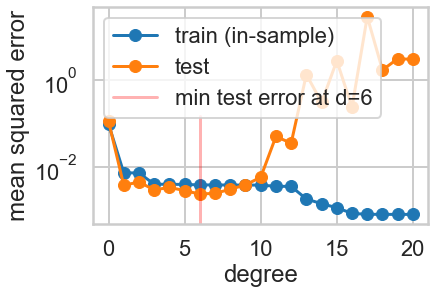

In [38]:
for d in degrees:
    Xtrain = traintestlists[d]['train']
    Xtest = traintestlists[d]['test']
    est = LinearRegression()
    est.fit(Xtrain, ytrain)
    prediction_on_training = est.predict(Xtrain)
    prediction_on_test = est.predict(Xtest)
    error_train[d] = mean_squared_error(ytrain, prediction_on_training)
    error_test[d] = mean_squared_error(ytest, prediction_on_test)

plt.plot(degrees, error_train, marker='o', label='train (in-sample)')
plt.plot(degrees, error_test, marker='o', label='test')
plt.axvline(np.argmin(error_test), 0,0.5, color='r', label="min test error at d=%d"%np.argmin(error_test), alpha=0.3)
plt.ylabel('mean squared error')
plt.xlabel('degree')
plt.legend(loc='upper left')
plt.yscale("log")

NameError: name 'mindegintrain' is not defined

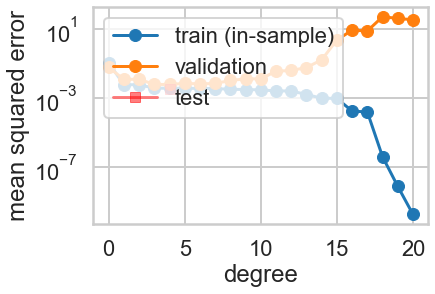

In [40]:
intrain,invalid = train_test_split(itrain,train_size=18, test_size=6)
xntrain= df.x[intrain].values
fntrain = df.f[intrain].values
yntrain = df.y[intrain].values
xnvalid= df.x[invalid].values
fnvalid = df.f[invalid].values
ynvalid = df.y[invalid].values

degrees=range(21)
error_train=np.empty(len(degrees))
error_valid=np.empty(len(degrees))
trainvalidlists=make_features(xntrain, xnvalid, degrees)

for d in degrees:
    Xntrain = trainvalidlists[d]['train']
    Xnvalid = trainvalidlists[d]['test']
    est = LinearRegression()
    est.fit(Xntrain, yntrain)
    error_train[d] = mean_squared_error(yntrain, est.predict(Xntrain))
    error_valid[d] = mean_squared_error(ynvalid, est.predict(Xnvalid))

mindeg = np.argmin(error_valid) 
ttlist=make_features(xtrain, xtest, degrees)
clf = LinearRegression()
clf.fit(ttlist[mindeg]['train'], ytrain)
pred = clf.predict(ttlist[mindeg]['test'])
err = mean_squared_error(ytest, pred)
plt.plot(degrees, error_train, marker='o', label='train (in-sample)')
plt.plot(degrees, error_valid, marker='o', label='validation')
plt.plot([mindeg], [err], marker='s', markersize=10, label='test', alpha=0.5, color='r')
plt.ylabel('mean squared error')
plt.xlabel('degree')
plt.legend(loc='upper left')
plt.yscale("log")
print (mindegintrain,invalid = train_test_split(itrain,train_size=18, test_size=6))
xntrain= df.x[intrain].values
fntrain = df.f[intrain].values
yntrain = df.y[intrain].values
xnvalid= df.x[invalid].values
fnvalid = df.f[invalid].values
ynvalid = df.y[invalid].values

degrees=range(21)
error_train=np.empty(len(degrees))
error_valid=np.empty(len(degrees))
trainvalidlists=make_features(xntrain, xnvalid, degrees)

for d in degrees:
    Xntrain = trainvalidlists[d]['train']
    Xnvalid = trainvalidlists[d]['test']
    est = LinearRegression()
    est.fit(Xntrain, yntrain)
    error_train[d] = mean_squared_error(yntrain, est.predict(Xntrain))
    error_valid[d] = mean_squared_error(ynvalid, est.predict(Xnvalid))

mindeg = np.argmin(error_valid) 
ttlist=make_features(xtrain, xtest, degrees)
clf = LinearRegression()
clf.fit(ttlist[mindeg]['train'], ytrain)
pred = clf.predict(ttlist[mindeg]['test'])
err = mean_squared_error(ytest, pred)
plt.plot(degrees, error_train, marker='o', label='train (in-sample)')
plt.plot(degrees, error_valid, marker='o', label='validation')
plt.plot([mindeg], [err], marker='s', markersize=10, label='test', alpha=0.5, color='r')
plt.ylabel('mean squared error')
plt.xlabel('degree')
plt.legend(loc='upper left')
plt.yscale("log")
print (mindeg)

6


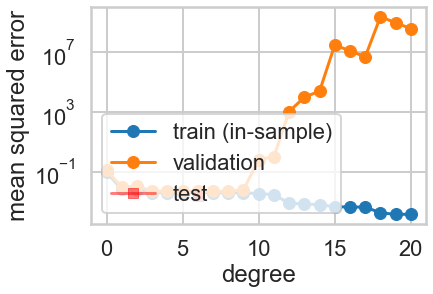

In [41]:
intrain,invalid = train_test_split(itrain,train_size=18, test_size=6)
xntrain= df.x[intrain].values
fntrain = df.f[intrain].values
yntrain = df.y[intrain].values
xnvalid= df.x[invalid].values
fnvalid = df.f[invalid].values
ynvalid = df.y[invalid].values

degrees=range(21)
error_train=np.empty(len(degrees))
error_valid=np.empty(len(degrees))
trainvalidlists=make_features(xntrain, xnvalid, degrees)

for d in degrees:
    Xntrain = trainvalidlists[d]['train']
    Xnvalid = trainvalidlists[d]['test']
    est = LinearRegression()
    est.fit(Xntrain, yntrain)
    error_train[d] = mean_squared_error(yntrain, est.predict(Xntrain))
    error_valid[d] = mean_squared_error(ynvalid, est.predict(Xnvalid))

mindeg = np.argmin(error_valid)
ttlist=make_features(xtrain, xtest, degrees)
clf = LinearRegression()
clf.fit(ttlist[mindeg]['train'], ytrain)
pred = clf.predict(ttlist[mindeg]['test'])
err = mean_squared_error(ytest, pred)
plt.plot(degrees, error_train, marker='o', label='train (in-sample)')
plt.plot(degrees, error_valid, marker='o', label='validation')
plt.plot([mindeg], [err], marker='s', markersize=10, label='test', alpha=0.5, color='r')

plt.ylabel('mean squared error')
plt.xlabel('degree')
plt.legend(loc='lower left')
plt.yscale("log")
print (mindeg)

In [47]:
from sklearn.model_selection import KFold
n_folds=4
degrees=range(21)
results=[]
for d in degrees:
    hypothesisresults=[]
    for train, test in KFold(24, n_folds):
        tvlist=make_features(xtrain[train], xtrain[test], degrees)
        clf = LinearRegression()
        clf.fit(tvlist[d]['train'], ytrain[train])
        hypothesisresults.append(mean_squared_error(ytrain[test], clf.predict(tvlist[d]['test'])))
    results.append((np.mean(hypothesisresults), np.min(hypothesisresults), np.max(hypothesisresults)))

TypeError: shuffle must be True or False; got 4